# Proyecto - Algoritmos de clasificación

#### Se utilizará un dataset para los algoritmos de clasificación llamado Heart Disease-UCI de Kaggles

#### Exploración

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
faltante = df.isnull().sum()
faltante

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
# Estadisticos
summary_stats = df.describe()
summary_stats

info = df.info()
info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


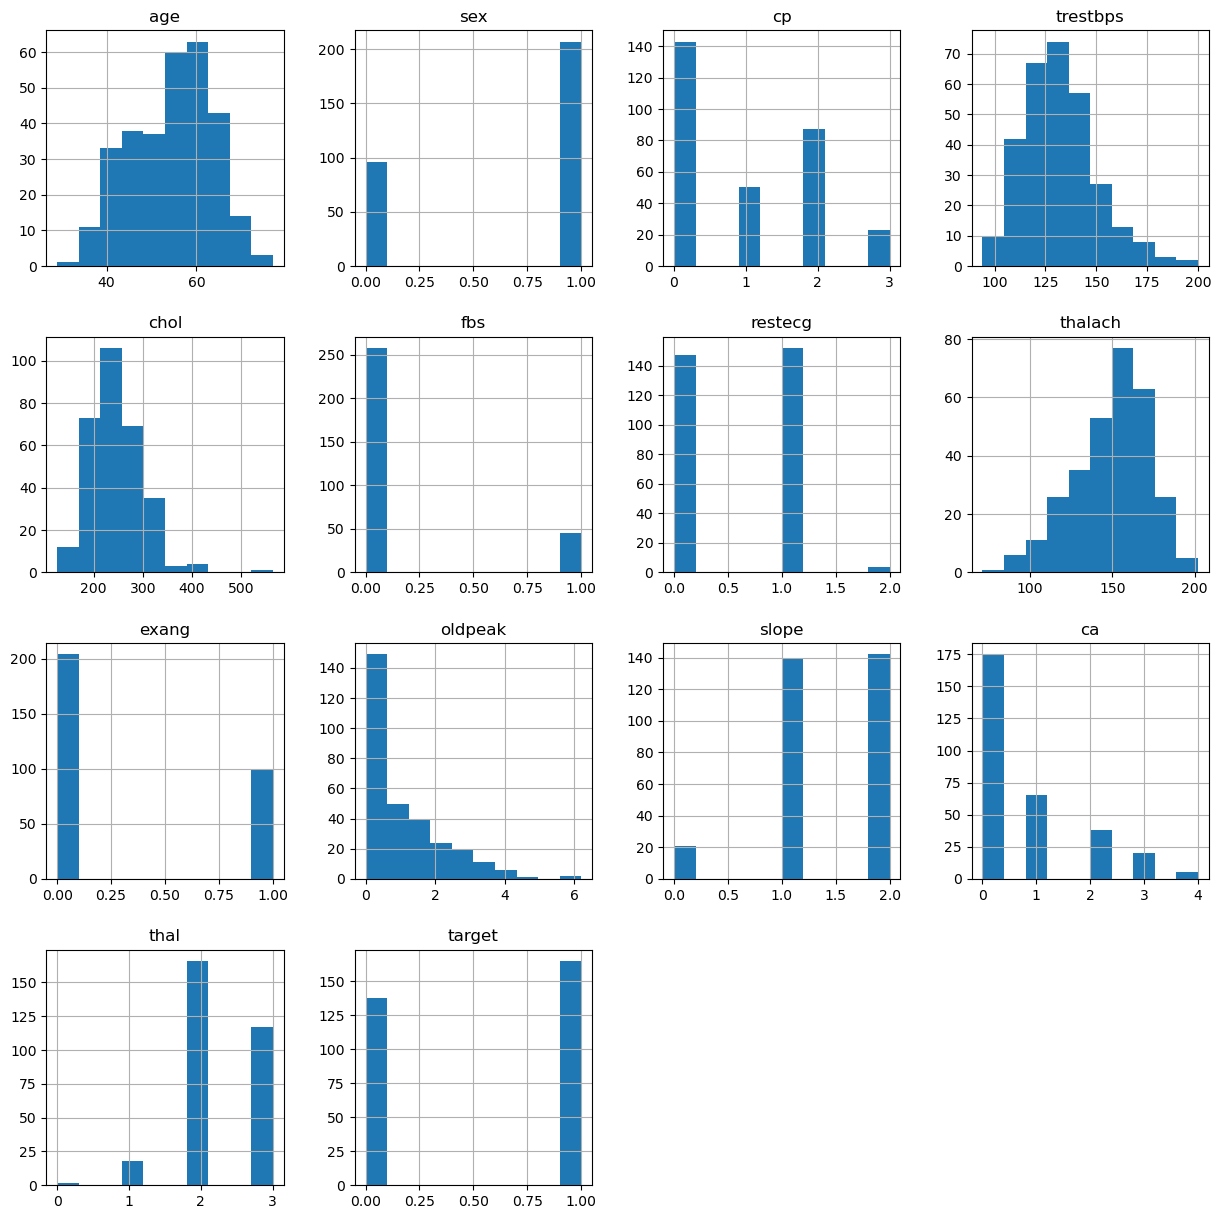

In [17]:
# Distribución
df.hist(figsize=(15, 15))
plt.show()

cat_f = df.select_dtypes(include=['object', 'category']).columns
for feature in cat_f:
    sns.countplot(y=df[feature])
    plt.show()

#### Codificación

In [78]:
df_codificar = pd.get_dummies(df, drop_first=True)
df_codificar.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Outliers

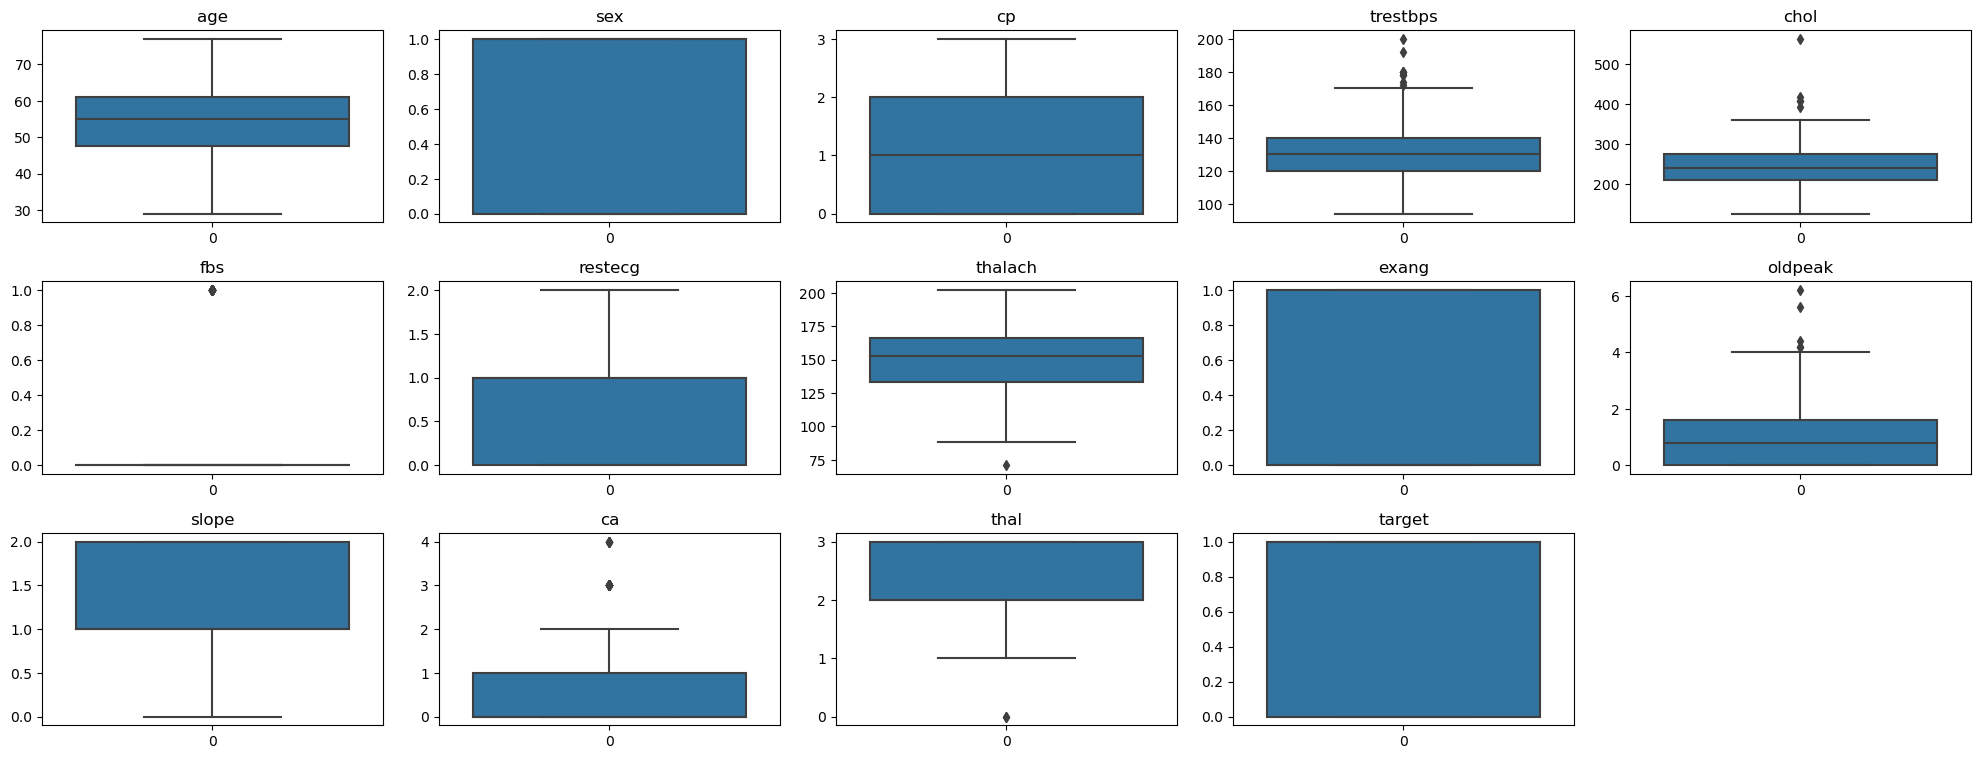

In [75]:
plt.figure(figsize=(20, 15))
for i, column in enumerate(df_codificar.columns, 1):
    plt.subplot(6, 5, i)
    sns.boxplot(df_codificar[column])
    plt.title(column)

plt.tight_layout()
plt.show()

#### Modelos de clasificación

In [20]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

# Dividir el dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Modelo Naives

In [44]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Entrenar
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

# Predecir
y_pred_nb = model_nb.predict(X_test)

# Evaluar
nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes resultado: {nb}")

Naive Bayes resultado: 0.8688524590163934


#### LDA

In [47]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Entrenar
model_lda = LinearDiscriminantAnalysis()
model_lda.fit(X_train, y_train)

# Predecir
y_pred_lda = model_lda.predict(X_test)

# Evaluar
lda = accuracy_score(y_test, y_pred_lda)
print(f"LDA resultado: {lda}")

LDA resultado: 0.8688524590163934


#### Regresión Lineal

In [48]:
from sklearn.linear_model import LogisticRegression

# Entrenar
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)

# Predecir
y_pred_lr = model_lr.predict(X_test)

# Evaluar
lr = accuracy_score(y_test, y_pred_lr)
print(f"Regresión logistica resultado: {lr}")

Regresión logistica resultado: 0.8852459016393442


#### SVM

In [49]:
from sklearn.svm import SVC

# Entrenar
model_svm = SVC(kernel='linear', C=1)
model_svm.fit(X_train, y_train)

# Predecir
y_pred_svm = model_svm.predict(X_test)

# Evaluar
svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM resultado: {svm}")

SVM resultado: 0.8688524590163934


#### Arbol de decision

In [50]:
from sklearn.tree import DecisionTreeClassifier

# Entrenar
model_dt = DecisionTreeClassifier(max_depth=5)
model_dt.fit(X_train, y_train)

# Predecir
y_pred_dt = model_dt.predict(X_test)

# Evaluar
dt = accuracy_score(y_test, y_pred_dt)
print(f"Arbol de decision resultado: {dt}")

Arbol de decision resultado: 0.819672131147541


#### Random forest

In [76]:
from sklearn.ensemble import RandomForestClassifier

# Entrenar
model_rf = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=42)
model_rf.fit(X_train, y_train)

# Predecir
y_pred_rf = model_rf.predict(X_test)

# Evaluar
rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest resultado: {rf}")

Random Forest resultado: 0.8524590163934426


#### QDA

In [52]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Entrenar
model_qda = QuadraticDiscriminantAnalysis()
model_qda.fit(X_train, y_train)

# Predecir
y_pred_qda = model_qda.predict(X_test)

# Evaluar
qda = accuracy_score(y_test, y_pred_qda)
print(f"QDA resultado: {qda}")

QDA resultado: 0.8360655737704918


#### AdaBoost

In [53]:
from sklearn.ensemble import AdaBoostClassifier

# Entrenar
model_ab = AdaBoostClassifier(n_estimators=100, random_state=42)
model_ab.fit(X_train, y_train)

# Predecir
y_pred_ab = model_ab.predict(X_test)

# Evaluar
adb = accuracy_score(y_test, y_pred_ab)
print(f"AdaBoost resultado: {adb}")

C:\Users\flord\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost resultado: 0.7704918032786885


#### Gradient Boosting

In [77]:
from sklearn.ensemble import GradientBoostingClassifier

# Entrenar
model_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model_gb.fit(X_train, y_train)

# Predecir
y_pred_gb = model_gb.predict(X_test)

# Evaluar
gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting resultado: {gb}")

Gradient Boosting resultado: 0.7704918032786885


#### XGBoost

In [55]:
from xgboost import XGBClassifier

# Entrenar
model_xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model_xgb.fit(X_train, y_train)

# Predecir
y_pred_xgb = model_xgb.predict(X_test)

# Evaluar
xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost resultado: {xgb}")

ModuleNotFoundError: No module named 'xgboost'

#### LGBM

In [65]:
from lightgbm import LGBMClassifier

# Entrenar
model_lgbm = LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model_lgbm.fit(X_train, y_train)

# Predecir
y_pred_lgbm = model_lgbm.predict(X_test)

# Evaluar
lgbm = accuracy_score(y_test, y_pred_lgbm)
print(f"LGBM resultado: {lgbm}")

ModuleNotFoundError: No module named 'lightgbm'

In [70]:
resul = {
    'Modelos aplicados': ['Naive Bayes', 'LDA', 'Regresión Logística', 'SVM', 'Árbol de Decisión', 'Random Forest', 'QDA', 'AdaBoost', 'Gradient Boosting'],
    'Resultados': [nb, lda, lr, svm, dt, rf, qda, adb, gb]
}

r_df = pd.DataFrame(resul)

r_df.sort_values(by='Resultados', ascending=False, inplace=True)
print(r_df)

#xgb, lgbm, 'XGBoost', 'LGBM'

     Modelos aplicados  Resultados
2  Regresión Logística    0.885246
0          Naive Bayes    0.868852
1                  LDA    0.868852
3                  SVM    0.868852
5        Random Forest    0.852459
6                  QDA    0.836066
4    Árbol de Decisión    0.819672
7             AdaBoost    0.770492
8    Gradient Boosting    0.770492
